#### COSC 311 - Homework 3
##### Logan Kelsch

MAE:	33.82
MSE:	8189.09
RMSE:	90.49


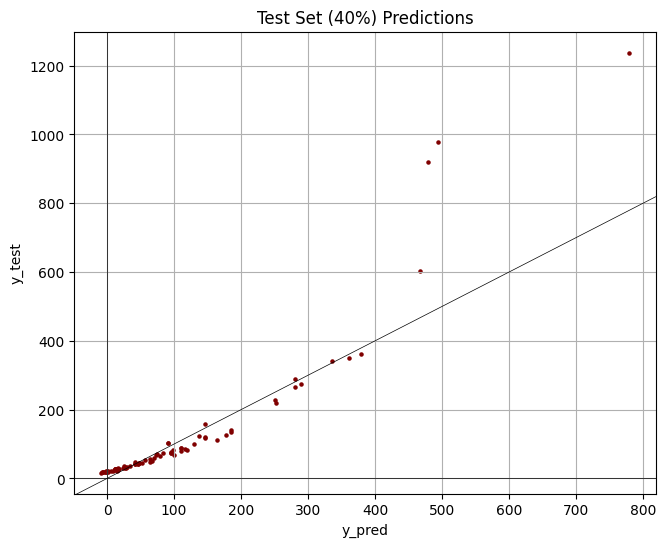

In [1]:
'''1. Regression model for Computer Hardware Dataset'''

# DATASET:  machine.data

#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error  #MSE
from sklearn.metrics import root_mean_squared_error #RMSE
import matplotlib.pyplot as plt

#bring data into pddf
data = pd.read_csv('machine.data')

#using data.info(), determined all data is clean.

#drop all irrelevant features for this task
data = data.drop(columns=['VendorName','ModelName','PRP'])

#generate the correlation of all features
#    to our selected target, "ERP"
co = data.corr()['ERP'].drop('ERP')
'''-----------------------------
    OUTPUT:            ANALYSIS:
    MYCT    -0.288396  ** DROP
    MMIN     0.819292  ** #2
    MMAX     0.901202  ** #1
    CACH     0.648620  ** #3
    CHMIN    0.610580  ** #4
    CHMAX    0.592156  ** DROP
'''#---------------------------

#drop least correlated features
data = data.drop(columns=['MYCT','CHMAX'])

#separate features and target into X and y
X = data.iloc[:, :-1].values #NON 'ERP'
y = data.iloc[:, -1].values  #'ERP'

#split data into train and testing
X_train, X_test, y_train, y_test = train_test_split\
                            (X, y, test_size= 0.4, random_state=42)

#set, fit and collect predictions of linear regression model
mlr = LinearRegression()
mlr.fit(X_train,y_train)
y_pred = mlr.predict(X_test)

#metrics printout 'MAE', 'MSE', 'RMSE'
print(f'MAE:\t{mean_absolute_error(y_test,y_pred):.2f}')
print(f'MSE:\t{mean_squared_error(y_test,y_pred):.2f}')
print(f'RMSE:\t{root_mean_squared_error(y_test,y_pred):.2f}')

'''####                   ####                      ####
    This code was ripped from some of my personal code.
    The black diagonal line is the y = x line, 
                   or perfect prediction line.
'''####                   ####                      ####
plt.figure(figsize=(7.5, 6))
plt.scatter(y_pred, y_test, s=5, color='maroon')
plt.grid()
plt.axis('tight')
plt.title('Test Set (40%) Predictions')
plt.xlabel('y_pred')
plt.ylabel('y_test')
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = x_vals  # Since y = x
plt.plot(x_vals, y_vals, '-', color='black', label='y = x', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.show()

Dimensions reduced from 64 to 17.

Center 1: [ 15.96 -11.69 -13.91   2.68  -0.69  -8.67   2.42   3.43   2.39   0.39
   1.1    2.19  -0.81   0.45  -0.03  -1.37   0.67]
Center 2: [-19.48  -1.2    0.47   6.76   0.52  -2.22  -1.57  -3.45   7.48   0.31
   1.49   0.54  -1.13  -2.08   1.33  -0.83  -0.21]
Center 3: [ -0.92   4.89  -0.18 -14.26 -15.58   2.19   1.42   0.74   2.5   -1.8
   3.05   0.05   0.54   0.91   1.28  -1.22  -0.49]
Center 4: [ 8.56 15.98 -1.82 11.15  0.61  6.81  1.4   1.95 -2.2  -1.05  1.95 -0.97
 -0.43 -2.01  0.75 -0.04 -0.17]
Center 5: [-12.54  -9.51   7.11   5.44  -3.99  -0.64   2.02  -0.07  -6.26   0.47
  -0.29   0.36  -0.09   0.99  -0.1    0.67   0.97]
Center 6: [  1.76 -21.23   4.53  -8.51   7.93   8.19  -1.97  -0.18  -0.46  -1.7
   0.87   0.28   1.69  -2.07  -0.72  -1.84  -0.66]
Center 7: [ -8.78   6.49 -19.65  -0.03   1.25   1.15  -8.52  -0.48  -1.52  -0.53
  -2.09  -1.09   1.8    2.7   -1.4    1.79  -1.88]
Center 8: [-2.21  5.25 -1.77 -0.43  2.89  3.71  6.57  7.06  

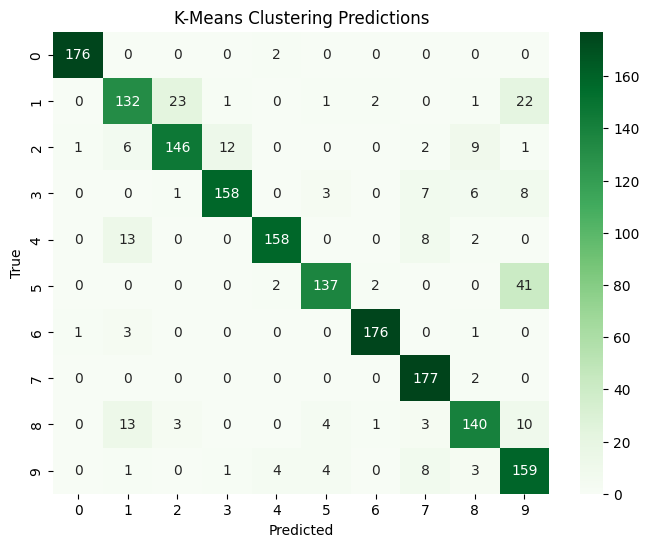

In [48]:
'''2. PCA and K-means hand-written digits classification'''

# DATASET:  UCI ML - from - sklearn and 'COSC311_Module5_4_Kmeans clustering'

#import libraries and functions
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import mode

#load and prep dataset
data = load_digits(as_frame=True)
data = data.frame
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

#pca initiation
pca = PCA()
pca.fit(X)

#PCA primary component and variance calculation
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.85) + 1

#PCA final prep and data transformation
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

#dimension reduction confirmation printout
print(f'Dimensions reduced from {X.shape[1]} to {X_pca.shape[1]}.\n')

n_clusters = 10 #declare number of clusters for task req

#prep kmeans              =4 rooms
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)
#kmeans.transform(X)

#declare predictions and set center values
y_kmeans = kmeans.predict(X_pca)
centers = kmeans.cluster_centers_

#center printouts
for i in range(len(centers)):
    centers[i] = centers[i]*100//1/100
    print(f'Center {i+1}: {centers[i]}')

#custom function I made to return a fixed list of prediction values
#that are using the correct clusters by pairing the 'y_kmeans'
#predictions with the cluster in the target vector that are most
#overlapping for each predicted cluster value
def find_clust(y_true, y_kmeans, n_clusters):
    #this 2d array is a list of all indices for each index value where the 
    #index is the prediction value in y_kmeans
    cluster_indices_for = []
    for n in range(n_clusters):
        #                grab all y_kmeans indices with values of n
        cluster_indices_for.append(np.where((y_kmeans[:] == n))[0])
    
    #the lengths of samples must not have bene changed for this function to operate
    if(y_true.shape[0] != y_kmeans.shape[0]):
        raise Exception(f"Error: y_true shape {y_true.shape[0]}\
                        does not match y_kmeans shape {y_kmeans.shape[0]}")

    #this is a list of n_cluster values, where each value is the correct correlated 
    #target cluster for the given y_kmeans prediction, which is the values index
    cluster_pair = []
    for n in range(n_clusters):
        clust_true = y_true[cluster_indices_for[n]]
        #         use of scipy.stats mode function
        cluster_pair.append(mode(clust_true).mode)

    #creating new array of all corrected predictions from
    #pairing cluster prediction from y_kmeans
    y_pred_matched = []
    for val in y_kmeans:
        #grab corrected prediction value from index (y_kmeans prediction)
        y_pred_matched.append(cluster_pair[val])

    return y_pred_matched

y_pred = find_clust(y, y_kmeans, n_clusters=n_clusters)

#very simple function to gather the total accuracy of the clustering
#predictions, since accuracy_score does not work for multiclass values
def multi_class_accuracy(y_true, y_pred):
    total, correct = 0, 0
    for i in range(len(y_true)):
        total+=1
        if(y_true[i] == y_pred[i]):
            correct+=1
    return round(correct/total, 2)

print(f'Clustering Accuracy: {int(100*multi_class_accuracy(y,y_pred))}%')

#confusion matrix creation
cm = confusion_matrix(y, y_pred)

#confusion matrix output
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Means Clustering Predictions')
plt.show()